In [57]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [58]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [59]:
len(X_test)

10000

In [60]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [61]:
X_train[0].shape

(28, 28)

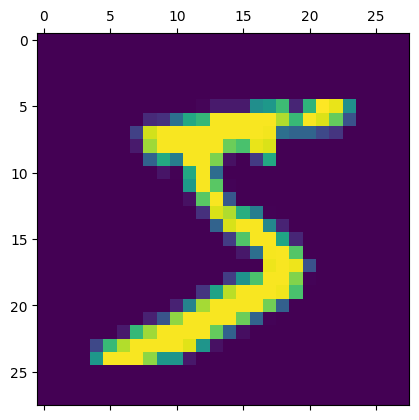

In [62]:
plt.matshow(X_train[0])

In [63]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [64]:
# FLATTENING OUR DATASET(ARRAY) IT MEANS TP CONVERT 2-D ARRAY INTO 1-D ARRAY
X_train.shape

(60000, 28, 28)

In [65]:
X_train = X_train/255
X_test = X_test/255

In [66]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [67]:
X_train_flattened = X_train.reshape(len(X_train),28*28)# AS WE WANT TO CONVERT THESE 60000 AND REDUCE THE DIMENSION INTO 784(28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [68]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [69]:
# TRAINING OUR MODEL 
model = keras.Sequential([ # "10" IS OUR OUTPUT(DIGITS),"784" NEURONS ARE OUR INPUT 
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') # HERE DENSE MEANS EVERY NEURON IN FIRST LAYER IS CONNECTED TO EVERY OTHER NEURON IN NEXT LAYER 
])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flattened,y_train,epochs = 5)

C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 703us/step - accuracy: 0.8140 - loss: 0.7160
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.9137 - loss: 0.3100
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.9212 - loss: 0.2841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.9242 - loss: 0.2689
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9262 - loss: 0.2668


In [70]:
#TESTING OUR MODEL
model.evaluate(X_test_flattened,y_test) # ACCURACY WITHOUT HIDDEN LAYER 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9120 - loss: 0.3056


[0.2674034535884857, 0.9240000247955322]

In [71]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step


array([2.26293597e-02, 4.37308785e-07, 5.36127239e-02, 9.57522988e-01,
       2.61809328e-03, 1.40680104e-01, 1.01581520e-06, 9.99803364e-01,
       1.04114905e-01, 7.85912991e-01], dtype=float32)

In [72]:
np.argmax(y_predicted[0])

7

In [73]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [74]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    4,    4,    4,    1,    1],
       [   0, 1118,    4,    2,    0,    1,    3,    2,    5,    0],
       [   4,   10,  930,   14,    8,    3,   10,   12,   36,    5],
       [   3,    0,   20,  913,    0,   28,    2,   12,   23,    9],
       [   2,    2,    7,    1,  901,    0,    7,    4,    5,   53],
       [  10,    3,    8,   24,   11,  780,   10,    8,   29,    9],
       [  15,    3,   12,    1,    8,   13,  901,    2,    3,    0],
       [   1,    7,   22,    4,    8,    0,    0,  946,    1,   39],
       [   7,   15,    7,   22,    9,   27,    8,   12,  854,   13],
       [  11,    7,    1,    9,   18,    6,    0,   19,    5,  933]])>

Text(95.72222222222221, 0.5, 'truth')

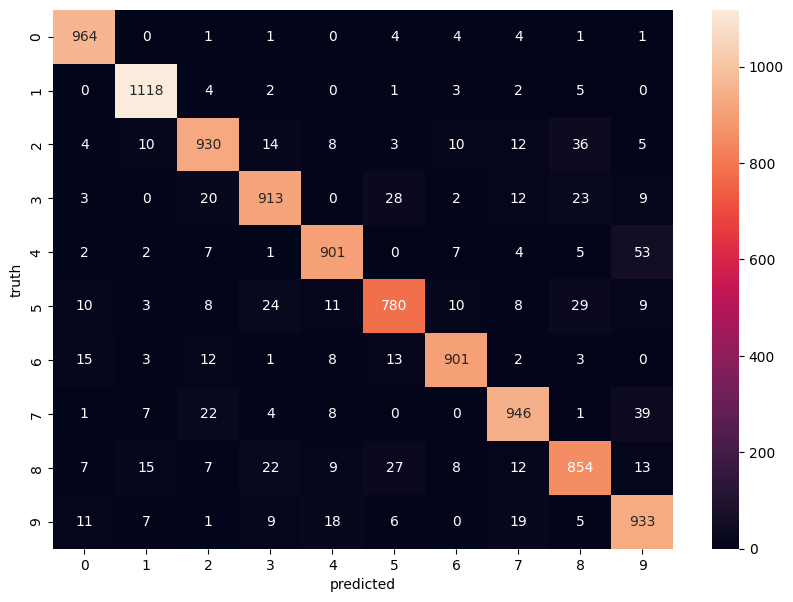

In [75]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm, annot = True ,fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [76]:
# ADDING HIDDEN LAYER INTO OUR MODEL 
model = keras.Sequential([ # "10" IS OUR OUTPUT(DIGITS),"784" NEURONS ARE OUR INPUT 
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), # 1 HIDDEN LAYER
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback =  tf.keras.callbacks.TensorBoard(log_dir = "logs/",histogram_freq = 1)
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flattened,y_train,epochs = 5,callbacks= [tb_callback])

C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8671 - loss: 0.4664
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9611 - loss: 0.1330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9729 - loss: 0.0907
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0641
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9846 - loss: 0.0488


In [77]:
model.evaluate(X_test_flattened,y_test) # ACCURACY WITH HIDDEN LAYER 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.9702 - loss: 0.1012


[0.08488716185092926, 0.9739000201225281]

Text(95.72222222222221, 0.5, 'truth')

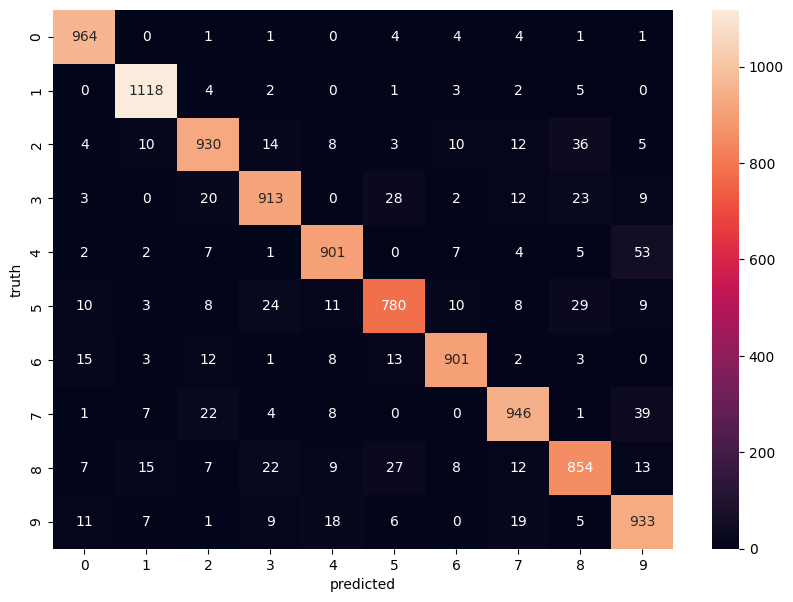

In [78]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm, annot = True ,fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [79]:
model = keras.Sequential([ # "10" IS OUR OUTPUT(DIGITS),"784" NEURONS ARE OUR INPUT 
    keras.layers.Flatten(input_shape=(28,28)), # IT CAN DIRECTLY MAKE A FLATTEN ARRAY BY ITSELF INSTEAD OF DOING IT MANUALLY EVERY TIME
    keras.layers.Dense(100,activation='relu'), # 1 HIDDEN LAYER
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 5)

Epoch 1/5


C:\Users\jenish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.8717 - loss: 0.4529
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.9599 - loss: 0.1363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.9737 - loss: 0.0889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9797 - loss: 0.0675
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0518


In [80]:
model = keras.Sequential([ # "10" IS OUR OUTPUT(DIGITS),"784" NEURONS ARE OUR INPUT 
    keras.layers.Flatten(input_shape=(28,28)), # IT CAN DIRECTLY MAKE A FLATTEN ARRAY BY ITSELF INSTEAD OF DOING IT MANUALLY EVERY TIME
    keras.layers.Dense(100,activation='relu'), # 1 HIDDEN LAYER
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer = 'RMSprop',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.8798 - loss: 0.4297
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.9590 - loss: 0.1353
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.9719 - loss: 0.0976
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9782 - loss: 0.0724
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9826 - loss: 0.0597


In [81]:
# ACURACY SCORES WITH DIFFERENT OPTIMIZERS
#1) SGD - 0.9272
#2) AdamW - 0.9852
#3) AdamAx - 0.9639
#4) Lion - 0.9584
#5) RMSprop - 0.9817

# CNN

In [88]:
from tensorflow.keras import datasets,layers,models

In [92]:
cnn = keras.Sequential([
    layers.Conv2D(filters = 20,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 40,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(50 , activation = 'relu'),
    layers.Dense(25,activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid'),
])
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'],
           )
cnn.fit(X_train,y_train,epochs = 10)
    

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8677 - loss: 0.4165
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9810 - loss: 0.0599
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0430
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0320
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9919 - loss: 0.0259
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9940 - loss: 0.0194
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9953 - loss: 0.0153
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9951 - loss: 0.0141
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9964 - loss: 0.0103
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9967 - loss: 0.0107


In [93]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.9722 - loss: 0.0991


[0.08687648177146912, 0.9769999980926514]